In [2]:
# https://signate.jp/competitions/1247
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path.append("../_utils") # システムパスに対象ディレクトリを追加
import utils

train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
sample_submit = pd.read_csv('./data/sample_submission.csv', index_col=0, header=None)

# 分析

In [3]:
# trainデータの先頭行を表示
train.head()

,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,English oak,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,2016-05-09,15,OnCurb,0,NaN,NaN,Damage,NYC Parks Staff,NaN,honeylocust,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,2016-06-24,23,OnCurb,1,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9


In [3]:
# testデータの先頭行を表示
test.head()

,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,Callery pear,Pyrus calleryana,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3,3062000,Brooklyn,Brooklyn,315,22,45,48
19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,NaN,cherry,Prunus,BX62,Woodlawn-Wakefield,2,2045101,Bronx,Bronx,212,34,81,11
19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,NaN,littleleaf linden,Tilia cordata,QN60,Kew Gardens,4,4013800,Queens,Kew Gardens,409,14,27,29
19987,2015-08-06,7,OnCurb,NaN,NaN,NoDamage,TreesCount Staff,NaN,dawn redwood,Metasequoia glyptostroboides,BK09,Brooklyn Heights-Cobble Hill,3,3000301,Brooklyn,Brooklyn,302,26,52,33
19988,2015-10-21,6,OnCurb,1or2,Helpful,NoDamage,TreesCount Staff,Stones,purple-leaf plum,Prunus cerasifera,BK75,Bedford,3,3025100,Brooklyn,Brooklyn,303,25,56,36


In [4]:
train.info()

# NAN削除後の情報
# train_dropna = train.dropna()
# print(train_dropna.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     5101 non-null   object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null  int64 
 20  cncldi

In [8]:
print(train["created_at"].value_counts())
print(train["created_at"].unique())
# print(train["tree_dbh"].value_counts())
# print(train["curb_loc"].value_counts())
# print(train["health"].value_counts()) # 目的変数
# print(train["steward"].value_counts())
# print(train["guards"].value_counts())
# print(train["sidewalk"].value_counts())
# print(train["user_type"].value_counts())
# print(train["problems"].value_counts())
# print(train["spc_common"].value_counts())
# print(train["spc_latin"].value_counts())
# print(train["nta"].value_counts())
# print(train["nta_name"].value_counts())
# print(train["borocode"].value_counts())
# print(train["boro_ct"].value_counts())
# print(train["boroname"].value_counts())
# print(train["zip_city"].value_counts())
# print(train["cb_num"].value_counts())
# print(train["st_senate"].value_counts())
# print(train["st_assem"].value_counts())
# print(train["cncldist"].value_counts())

2015-10-15    421
2015-10-16    320
2015-10-21    249
2015-09-26    248
2015-11-13    246
             ... 
2016-04-25      4
2016-09-25      3
2016-01-01      3
2016-04-21      2
2016-03-07      2
Name: created_at, Length: 447, dtype: int64
['2015-06-29' '2016-09-21' '2015-09-13' '2016-05-09' '2016-06-24'
 '2015-08-11' '2015-10-24' '2016-06-04' '2016-07-22' '2015-10-13'
 '2015-10-30' '2015-09-26' '2015-08-05' '2015-07-18' '2015-08-30'
 '2015-05-27' '2016-08-25' '2016-02-27' '2015-08-12' '2015-07-11'
 '2015-11-13' '2015-08-18' '2016-09-11' '2015-09-24' '2015-07-13'
 '2016-08-07' '2015-10-01' '2015-06-22' '2015-10-09' '2015-09-22'
 '2015-06-27' '2015-10-21' '2015-10-07' '2016-06-29' '2016-09-12'
 '2015-07-02' '2016-07-25' '2015-10-19' '2015-08-03' '2015-07-27'
 '2015-11-21' '2015-11-20' '2015-10-22' '2015-12-07' '2016-07-27'
 '2016-05-11' '2015-08-19' '2016-07-04' '2015-10-15' '2015-11-10'
 '2015-07-25' '2016-06-27' '2016-06-16' '2015-11-01' '2015-11-11'
 '2015-06-08' '2016-05-17' '2015

In [13]:
# trainデータの統計的な情報を表示
print(train.describe())

           tree_dbh        health      borocode       boro_ct        cb_num  \
count  19984.000000  19984.000000  19984.000000  1.998400e+04  19984.000000   
mean      11.694906      0.858036      3.360088  3.405346e+06    343.159077   
std        8.198150      0.437807      1.232246  1.239741e+06    122.264942   
min        1.000000      0.000000      1.000000  1.000202e+06    101.000000   
25%        5.000000      1.000000      3.000000  3.005900e+06    301.000000   
50%        9.000000      1.000000      4.000000  4.009200e+06    402.000000   
75%       17.000000      1.000000      4.000000  4.122300e+06    413.000000   
max       42.000000      2.000000      5.000000  5.031902e+06    503.000000   

          st_senate      st_assem      cncldist  
count  19984.000000  19984.000000  19984.000000  
mean      21.111189     51.913981     30.346327  
std        7.188537     18.642931     14.824068  
min       10.000000     23.000000      1.000000  
25%       15.000000     33.000000     

In [14]:
# カテゴリカルな特徴量を数値に変換する
categorical_cols = ['created_at','curb_loc','steward','guards','sidewalk','user_type','problems','spc_common','spc_latin','nta','nta_name','boroname','zip_city']
train_label_encoding = utils.bulk_label_encoding(train, categorical_cols)
print(train_label_encoding[categorical_cols])

       created_at  curb_loc  steward  guards  sidewalk  user_type  problems  \
0              40         1        3       3         0          2        73   
1             439         1        1       1         1          2        73   
2             115         1        3       3         1          2        28   
3             304         1        3       3         0          0        73   
4             350         1        3       3         1          2        27   
...           ...       ...      ...     ...       ...        ...       ...   
19979         371         1        3       3         0          2        73   
19980         364         1        3       3         1          0        73   
19981          91         1        3       3         0          2        73   
19982         346         1        0       3         1          0        73   
19983          90         1        3       3         0          0        27   

       spc_common  spc_latin  nta  nta_name  borona

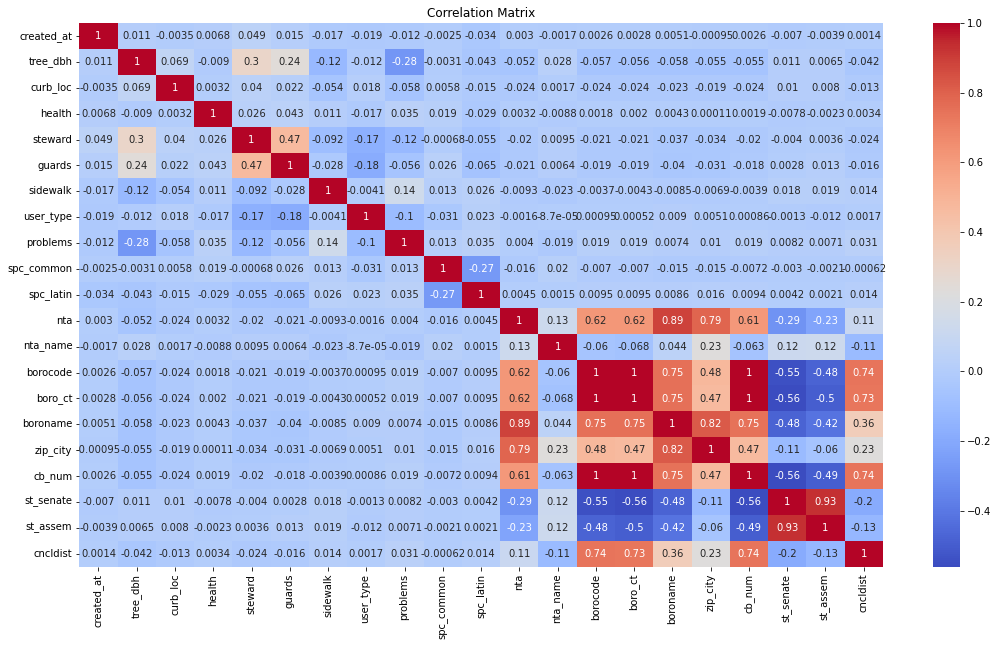

In [15]:
# 数値列の相関行列を計算
correlation_matrix = train_label_encoding.corr()
# 相関行列のヒートマップを可視化
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

spc_latin    -0.028900
user_type    -0.016837
tree_dbh     -0.008987
nta_name     -0.008838
st_senate    -0.007832
st_assem     -0.002293
zip_city      0.000115
borocode      0.001815
cb_num        0.001926
boro_ct       0.002043
nta           0.003150
curb_loc      0.003191
cncldist      0.003404
boroname      0.004267
created_at    0.006828
sidewalk      0.011332
spc_common    0.018847
steward       0.026304
problems      0.034581
guards        0.042566
Name: health, dtype: float64


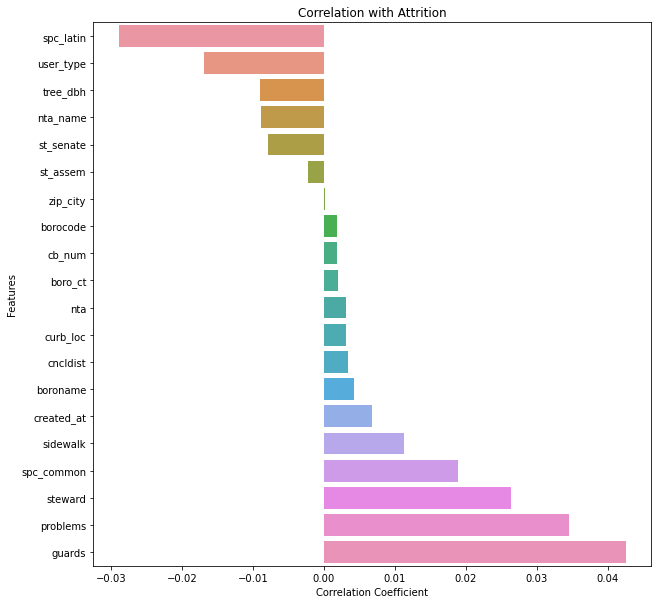

In [16]:
# 降順でソート
correlation_with_price_range = train_label_encoding.corr()['health'].drop('health')
correlation_with_price_range = correlation_with_price_range.sort_values(ascending=True)
print(correlation_with_price_range)

#横棒グラフで相関係数を表示 
#y_corrには特定の列の相関係数を格納 
fig, ax = plt.subplots(figsize=(10, 10)) 
#横棒グラフ作成 
sns.barplot(x=correlation_with_price_range, y=correlation_with_price_range.index, ax=ax) 
#X,Y軸とグラフタイトル 
ax.set_xlabel("Correlation Coefficient") 
ax.set_ylabel("Features") 
ax.set_title(f"Correlation with Attrition") 
#表示 
plt.show()


# 別パターンの分析

In [4]:
# NAがあるかどうかを確認する
train.isna().sum().any(),  test.isna().sum().any()

(True, True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19984 entries, 0 to 19983
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19984 non-null  object
 1   tree_dbh    19984 non-null  int64 
 2   curb_loc    19984 non-null  object
 3   health      19984 non-null  int64 
 4   steward     19983 non-null  object
 5   guards      5041 non-null   object
 6   sidewalk    19984 non-null  object
 7   user_type   19984 non-null  object
 8   problems    7741 non-null   object
 9   spc_common  19984 non-null  object
 10  spc_latin   19984 non-null  object
 11  nta         19984 non-null  object
 12  nta_name    19984 non-null  object
 13  borocode    19984 non-null  int64 
 14  boro_ct     19984 non-null  int64 
 15  boroname    19984 non-null  object
 16  zip_city    19984 non-null  object
 17  cb_num      19984 non-null  int64 
 18  st_senate   19984 non-null  int64 
 19  st_assem    19984 non-null  int64 
 20  cncldi

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19702 entries, 19984 to 39968
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  19702 non-null  object
 1   tree_dbh    19702 non-null  int64 
 2   curb_loc    19702 non-null  object
 3   steward     5176 non-null   object
 4   guards      5135 non-null   object
 5   sidewalk    19702 non-null  object
 6   user_type   19702 non-null  object
 7   problems    7657 non-null   object
 8   spc_common  19702 non-null  object
 9   spc_latin   19702 non-null  object
 10  nta         19702 non-null  object
 11  nta_name    19702 non-null  object
 12  borocode    19702 non-null  int64 
 13  boro_ct     19702 non-null  int64 
 14  boroname    19702 non-null  object
 15  zip_city    19702 non-null  object
 16  cb_num      19702 non-null  int64 
 17  st_senate   19702 non-null  int64 
 18  st_assem    19702 non-null  int64 
 19  cncldist    19702 non-null  int64 
dtypes:

In [6]:
# https://www.kaggle.com/code/dansbecker/handling-missing-values
# カラムごとの欠損値を表示
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

steward     14883
guards      14943
problems    12243
dtype: int64


In [7]:
# 各列の一意の値の数を確認します
train[train.columns].nunique().sort_values(ascending=True)

curb_loc         2
sidewalk         2
health           3
steward          3
guards           3
user_type        3
borocode         5
boroname         5
st_senate       26
tree_dbh        42
zip_city        45
cncldist        51
cb_num          59
st_assem        65
problems        73
spc_latin      120
spc_common     120
nta_name       187
nta            187
created_at     447
boro_ct       1193
dtype: int64

In [9]:
# 数値データを取得する
num_train = train.select_dtypes(include = ['int', 'float'])
num_train.head()

,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
0,14,1,4,4152901,411,11,25,23
1,5,1,2,2039901,207,33,78,15
2,26,2,5,5017011,503,24,62,51
3,15,0,5,5024401,503,24,62,51
4,23,1,1,1022102,110,30,70,9


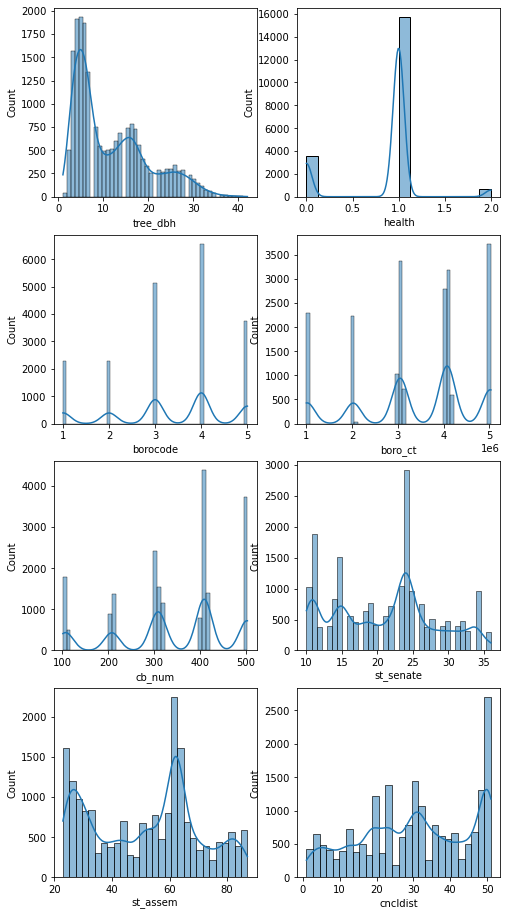

In [10]:
# 数値データをプロットする

# 数値カラムの行数を取得
# ※//にすると小数点切り下げになるみたい
rows = (len(num_train.columns)+1)//2
# ※_はfigsizeで指定した描画領域が返ってくるみたい
# ※axesはそれぞれのグラフデータを表してそう
_, axes = plt.subplots(rows, 2, figsize = (8, rows*4))
for i, col in enumerate(num_train.columns):
    hor = i%2 # 水平の位置
    ver = i//2 # 垂直の位置
    # seabornでヒストグラムを描画
    sns.histplot(data = num_train[col], kde = True, ax = axes[ver, hor])

In [11]:
# カテゴリ特徴を抽出する
# ※astype('category')でカテゴリー型に変換もしている
cat_train = train.select_dtypes(include = ['object']).astype('category')
cat_train.head()

,created_at,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,boroname,zip_city
0,2015-06-29,OnCurb,NaN,NaN,Damage,Volunteer,NaN,English oak,Quercus robur,QN45,Douglas Manor-Douglaston-Little Neck,Queens,Little Neck
1,2016-09-21,OnCurb,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,Acer platanoides 'Crimson King',BX05,Bedford Park-Fordham North,Bronx,Bronx
2,2015-09-13,OnCurb,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,Quercus robur,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,Staten Island
3,2016-05-09,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,honeylocust,Gleditsia triacanthos var. inermis,SI11,Charleston-Richmond Valley-Tottenville,Staten Island,Staten Island
4,2016-06-24,OnCurb,NaN,NaN,NoDamage,Volunteer,Stones,London planetree,Platanus x acerifolia,MN03,Central Harlem North-Polo Grounds,Manhattan,New York


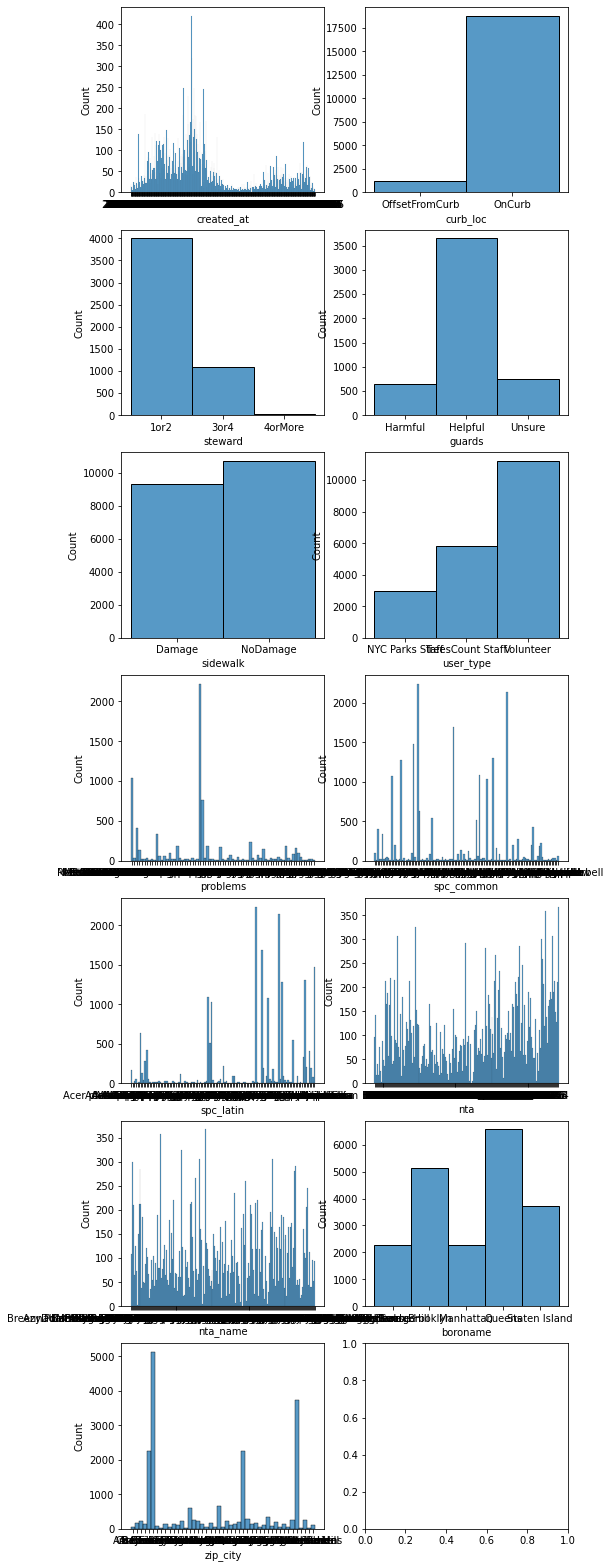

In [12]:
# カテゴリデータをプロットする

# カテゴリーカラムの行数を取得
# ※//にすると小数点切り下げになるみたい
rows = (len(cat_train.columns)+1)//2
_, axes = plt.subplots(rows, 2, figsize = (8, rows*4))
for i, col in enumerate(cat_train.columns):
    hor = i%2
    ver = i//2
    sns.histplot(data = cat_train[col], ax = axes[ver, hor])

In [20]:
# steward     14883
# guards      14943
# problems    12243
steward = train["steward"]
print(steward.head(10))
guards = train["guards"]
print(guards.head(10))
problems = train["problems"]
print(problems.head(10))

# 添え字が大きい要素に格納されていた値で欠損値を穴埋め
steward_fill = steward.fillna(method = 'bfill')
steward_fill.head(10)
train["steward"] = steward_fill
train

0     NaN
1    3or4
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
Name: steward, dtype: object
0        NaN
1    Helpful
2        NaN
3        NaN
4        NaN
5        NaN
6    Helpful
7        NaN
8        NaN
9        NaN
Name: guards, dtype: object
0                   NaN
1                   NaN
2    StonesBranchLights
3                   NaN
4                Stones
5                   NaN
6          BranchLights
7                   NaN
8                   NaN
9                Stones
Name: problems, dtype: object


,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,2015-06-29,14,OnCurb,1,3or4,NaN,Damage,Volunteer,NaN,English oak,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,crimson king maple,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2015-09-13,26,OnCurb,2,1or2,NaN,NoDamage,Volunteer,StonesBranchLights,English oak,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51
3,2016-05-09,15,OnCurb,0,1or2,NaN,Damage,NYC Parks Staff,NaN,honeylocust,...,SI11,Charleston-Richmond Valley-Tottenville,5,5024401,Staten Island,Staten Island,503,24,62,51
4,2016-06-24,23,OnCurb,1,1or2,NaN,NoDamage,Volunteer,Stones,London planetree,...,MN03,Central Harlem North-Polo Grounds,1,1022102,Manhattan,New York,110,30,70,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19979,2016-07-15,19,OnCurb,2,1or2,NaN,Damage,Volunteer,NaN,shingle oak,...,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,5,5018100,Staten Island,Staten Island,502,24,62,50
19980,2016-07-08,5,OnCurb,1,1or2,NaN,NoDamage,NYC Parks Staff,NaN,catalpa,...,SI32,Rossville-Woodrow,5,5020804,Staten Island,Staten Island,503,24,62,51
19981,2015-08-20,21,OnCurb,0,1or2,NaN,Damage,Volunteer,NaN,English oak,...,SI48,Arden Heights,5,5017010,Staten Island,Staten Island,503,24,62,51
19982,2016-06-20,4,OnCurb,1,1or2,NaN,NoDamage,NYC Parks Staff,NaN,littleleaf linden,...,MN25,Battery Park City-Lower Manhattan,1,1031704,Manhattan,New York,101,26,65,1


# 特徴量作り

In [12]:
import datetime

print(train["created_at"])
train['Date_datetime'] = pd.to_datetime(train['created_at'])
type(train['Date_datetime'])
# print(train[["created_at","Date_datetime"]])

train['Month'] = train['Date_datetime'].dt.month
train['Day'] = train['Date_datetime'].dt.day
train['Weekday'] = train['Date_datetime'].dt.day_name()
print(train[["created_at", "Date_datetime", 'Month', 'Day', 'Weekday']])

0        2015-06-29
1        2016-09-21
2        2015-09-13
3        2016-05-09
4        2016-06-24
            ...    
19979    2016-07-15
19980    2016-07-08
19981    2015-08-20
19982    2016-06-20
19983    2015-08-19
Name: created_at, Length: 19984, dtype: object
       created_at Date_datetime  Month  Day    Weekday
0      2015-06-29    2015-06-29      6   29     Monday
1      2016-09-21    2016-09-21      9   21  Wednesday
2      2015-09-13    2015-09-13      9   13     Sunday
3      2016-05-09    2016-05-09      5    9     Monday
4      2016-06-24    2016-06-24      6   24     Friday
...           ...           ...    ...  ...        ...
19979  2016-07-15    2016-07-15      7   15     Friday
19980  2016-07-08    2016-07-08      7    8     Friday
19981  2015-08-20    2015-08-20      8   20   Thursday
19982  2016-06-20    2016-06-20      6   20     Monday
19983  2015-08-19    2015-08-19      8   19  Wednesday

[19984 rows x 5 columns]
